### Performing mean and mode imputation

Typically you'd want to use mean imputation if variables are normally distributed and median imputation otherwise. In other words, if there are many outliers that you want to keep in your dataset, you'd want to use median imputation. It's important to note that mean and median imputation may distort the distribution of the original variables if there is a high percentage of missing data, so check this first.

In [19]:
# Importing the required libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [20]:
data = pd.read_csv('melb_data.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [22]:
# Calculating the percentage of missing data
data.isnull().mean().sort_values(ascending=False)

BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Car              0.004566
Suburb           0.000000
Bathroom         0.000000
Regionname       0.000000
Longtitude       0.000000
Lattitude        0.000000
Landsize         0.000000
Bedroom2         0.000000
Address          0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
Propertycount    0.000000
dtype: float64

In [23]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [24]:
# Checking the mean and median price
mean = data["Price"].mean()
median = data["Price"].median()
print('Mean Price:', mean)
print('Median Price:', median)

Mean Price: 1075684.079455081
Median Price: 903000.0


<AxesSubplot:>

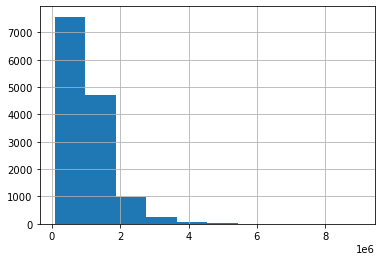

In [25]:
data["Price"].hist()

In [26]:
# Creating bins for the target variable. 
data["target_bins"] = pd.cut(data.Price,
    bins = [0., 650000, 903000, 1330000, np.inf],
    labels = [1, 2, 3, 4])

<AxesSubplot:>

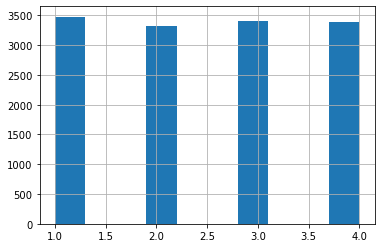

In [27]:
data["target_bins"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["target_bins"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

<AxesSubplot:>

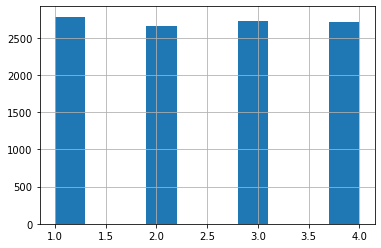

In [29]:
strat_train_set["target_bins"].hist()

In [30]:
data = strat_train_set.drop("target_bins", axis=1)
data_labels = strat_train_set["target_bins"].copy() 

In [31]:
data_cat = strat_train_set.select_dtypes(include=['object'])
data_num = strat_train_set.select_dtypes(include=[np.number]) # This gives true numbers only, no dates

In [32]:
# Calculating the percentage of missing data from the numeric dataset
data_num.isnull().mean().sort_values(ascending=False)

BuildingArea     0.477448
YearBuilt        0.396263
Car              0.004694
Rooms            0.000000
Price            0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Landsize         0.000000
Lattitude        0.000000
Longtitude       0.000000
Propertycount    0.000000
dtype: float64

In [33]:
# Calculating the percentage of missing data from the categoric dataset
data_cat.isnull().mean().sort_values(ascending=False)

CouncilArea    0.099503
Suburb         0.000000
Address        0.000000
Type           0.000000
Method         0.000000
SellerG        0.000000
Date           0.000000
Regionname     0.000000
dtype: float64

In [34]:
# Using scikit learn's simple imputer to fill the missing data with the mean 
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer instance to the numeric training data
imputer.fit(data_num)

SimpleImputer()

In [35]:
# Inspecting the values
imputer.statistics_

array([ 2.93354197e+00,  1.07481436e+06,  1.01083119e+01,  3.10443115e+03,
        2.91034610e+00,  1.52917894e+00,  1.60871174e+00,  5.67545747e+02,
        1.53232000e+02,  1.96429852e+03, -3.78095299e+01,  1.44995262e+02,
        7.45800488e+03])

In [36]:
# Replacing the missing data with the mean
X = imputer.transform(data_num)

In [37]:
data_num_tr = pd.DataFrame(X, columns=data_num.columns)

In [38]:
# Calculating the percentage of missing data
data_num_tr.isnull().mean().sort_values(ascending=False)

Rooms            0.0
Price            0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
Lattitude        0.0
Longtitude       0.0
Propertycount    0.0
dtype: float64

In [39]:
# Using scikit learn's simple imputer to fill the missing data with the mode 
imputer = SimpleImputer(strategy='most_frequent')

# Fitting the imputer instance to the categoric training data
imputer.fit(data_cat)

SimpleImputer(strategy='most_frequent')

In [40]:
# Inspecting the values
imputer.statistics_

array(['Reservoir', '1/1 Clarendon St', 'h', 'S', 'Nelson', '27/05/2017',
       'Boroondara', 'Southern Metropolitan'], dtype=object)

In [41]:
# Replacing the missing data with the mode
X = imputer.transform(data_cat)

In [42]:
data_cat_tr = pd.DataFrame(X, columns=data_cat.columns)

In [43]:
# Calculating the percentage of missing data
data_cat_tr.isnull().mean().sort_values(ascending=False)

Suburb         0.0
Address        0.0
Type           0.0
Method         0.0
SellerG        0.0
Date           0.0
CouncilArea    0.0
Regionname     0.0
dtype: float64